In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [35]:
# Load the data
data = {
    "eod_balance_training": pd.read_csv(
        "../berkabank/primary/eod_balance_training.csv"
    ),
    "incidents": pd.read_csv("../berkabank/primary/incidents.csv"),
}

core = pd.read_csv("../berkabank/primary/core.csv")

column_mapping = {
    "incidents": {
        "account_id": "account_id",
        "incident_date": "incident_date",
        "district_id": "district_id",
        "t0": "t0",
        "t1": "t1",
    },
    "eod_balance_training": {
        "account_id": "account_id",
        "balance_date": "balance_date",
        "end_of_day_balance": "end_of_day_balance",
        "daily_amount_flow": "daily_amount_flow",
        "n_transactions": "n_transactions",
        "days_since_account_creation": "days_since_account_creation",
        "low_balance_streak": "low_balance_streak",
        "district_id": "district_id",
    },
}


eod_balance_training = (
    data["eod_balance_training"]
    .loc[
        :,
        [
            "account_id",
            "balance_date",
            "end_of_day_balance",
            "daily_amount_flow",
            "n_transactions",
        ],
    ]
    .copy()
)

eod_balance_training["flow_category"] = (
    eod_balance_training["daily_amount_flow"].gt(0).replace({True: "inflow", False: "outflow"})
)
eod_balance_training["daily_amount_inflow"] = eod_balance_training["daily_amount_flow"].clip(lower=0)
eod_balance_training["daily_amount_outflow"] = eod_balance_training["daily_amount_flow"].clip(upper=0).abs()

In [36]:
eod_balance_training.head()

,account_id,balance_date,end_of_day_balance,daily_amount_flow,n_transactions,flow_category,daily_amount_inflow,daily_amount_outflow
0,576,1993-01-11,7107.0,6207.0,1.0,inflow,6207.0,0.0
1,576,1993-01-12,7107.0,0.0,1.0,outflow,0.0,0.0
2,576,1993-01-13,7107.0,0.0,1.0,outflow,0.0,0.0
3,576,1993-01-14,7107.0,0.0,1.0,outflow,0.0,0.0
4,576,1993-01-15,7107.0,0.0,1.0,outflow,0.0,0.0


In [37]:
from src.features.engineering import *

In [38]:
aggregation_list = [
    "mean",
    "min",
    "max",
    "sum",
    "std",
    "median",
    "skew",
    "kurtosis",
] + [f"percentile_{p}" for p in range(10, 100, 10)]

feature_based = ['daily_amount_inflow','daily_amount_outflow']

aggregations = create_aggregations(
    max_t=90,
    min_t=10,
    step=10,
    agg_funcs=aggregation_list,
    features=feature_based,
)




In [39]:
eod_balance_training.head()

,account_id,balance_date,end_of_day_balance,daily_amount_flow,n_transactions,flow_category,daily_amount_inflow,daily_amount_outflow
0,576,1993-01-11,7107.0,6207.0,1.0,inflow,6207.0,0.0
1,576,1993-01-12,7107.0,0.0,1.0,outflow,0.0,0.0
2,576,1993-01-13,7107.0,0.0,1.0,outflow,0.0,0.0
3,576,1993-01-14,7107.0,0.0,1.0,outflow,0.0,0.0
4,576,1993-01-15,7107.0,0.0,1.0,outflow,0.0,0.0


In [40]:
index = ['account_id']
features_selected = eod_balance_training.loc[:, index + feature_based]
eod_feature_matrix = EODBFeatures(
    eod_balance_training=features_selected,
    column_mapping=column_mapping["eod_balance_training"],
    aggregations=aggregations,
).run()

eod_feature_matrix = RatioFeatures(df = eod_feature_matrix,n=1000, strategy ="kurtosis").run()
eod_feature_matrix = RatioFeatures(df = eod_feature_matrix,n=1000, strategy ="random").run()
eod_feature_matrix.head()

----- Running EODBFeatures...
----- EODBFeatures completed.
--- Running DerivedFeatures...
--- DerivedFeatures completed.
--- Running DerivedFeatures...
--- DerivedFeatures completed.


,f_f_daily_amount_inflow__rolling_mean_10_days_sum,f_f_daily_amount_inflow__rolling_mean_10_days_size,f_f_daily_amount_inflow__rolling_mean_10_days_mean,f_f_daily_amount_inflow__rolling_mean_10_days_std,f_f_daily_amount_inflow__rolling_mean_10_days_min,f_f_daily_amount_inflow__rolling_mean_10_days_max,f_f_daily_amount_inflow__rolling_mean_10_days_skew,f_f_daily_amount_inflow__rolling_min_10_days_sum,f_f_daily_amount_inflow__rolling_min_10_days_size,f_f_daily_amount_inflow__rolling_min_10_days_mean,...,f_f_daily_amount_inflow__rolling_percentile_10_30_days_mean_ratio_f_f_daily_amount_outflow__rolling_percentile_70_70_days_sum,f_f_daily_amount_outflow__rolling_percentile_20_20_days_skew_ratio_f_f_daily_amount_inflow__rolling_sum_90_days_sum,f_f_daily_amount_outflow__rolling_percentile_30_20_days_max_ratio_f_f_daily_amount_inflow__rolling_sum_20_days_std,f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_max_40_days_sum_ratio_f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_outflow__rolling_max_10_days_max,f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_percentile_60_80_days_std_ratio_f_f_daily_amount_inflow__rolling_sum_70_days_min,f_f_daily_amount_outflow__rolling_max_40_days_min_ratio_f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_percentile_40_80_days_skew,f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_percentile_10_80_days_min_ratio_f_f_daily_amount_inflow__rolling_percentile_40_70_days_skew,f_f_daily_amount_outflow__rolling_percentile_30_40_days_mean_ratio_f_f_daily_amount_outflow__rolling_min_70_days_min,f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_std_20_days_mean_ratio_f_f_daily_amount_inflow__rolling_percentile_20_80_days_mean,f_f_daily_amount_outflow__rolling_percentile_10_40_days_min_ratio_f_f_daily_amount_outflow__rolling_skew_30_days_min_ratio_f_f_daily_amount_inflow__rolling_percentile_60_30_days_mean
account_id,,,,,,,,,,,,,,,,,,,,,
1,48664.10,301,166.657877,264.940386,0.0,1261.92,2.427014,0.0,301,0.0,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
2,276694.20,392,722.439164,1046.235074,0.0,3227.70,0.923714,0.0,392,0.0,...,0.0,0.0,0.0,0.001169,2.085958e+11,8.559382e-13,3.823074e+31,0.0,2.709776e+12,0.0
4,48762.50,275,183.317669,259.884361,0.0,555.30,0.739937,0.0,275,0.0,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
6,77522.12,380,208.954501,305.457798,0.0,666.90,0.837856,0.0,380,0.0,...,0.0,0.0,0.0,0.005101,6.970280e+11,4.183097e-13,4.256950e+31,0.0,1.010435e+13,0.0
9,57065.30,376,155.491281,305.585765,0.0,1432.96,2.876551,0.0,376,0.0,...,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0


In [41]:
from src.features.selection import *

In [42]:
feature_elimination_pipeline = FeatureEliminationPipeline(
    {
        "missing_rate": FeatureEliminationMissingRate(0.1),
        "cov": FeatureEliminationCoV(0.8),
        "kurtosis": FeatureEliminationKurtosis(3),
        "pearson": FeatureEliminationPearsonCorr(0.7),
        "vif": FeatureEliminationVIF(8),
    }
)

eod_feature_matrix = feature_elimination_pipeline.run(eod_feature_matrix, y=None)

In [43]:
eod_feature_matrix = FeatureImputer(eod_feature_matrix).run()

--- Running FeatureImputer...
--- FeatureImputer completed.


In [44]:
eod_feature_matrix.columns

Index(['f_f_daily_amount_inflow__rolling_mean_10_days_max',
       'f_f_daily_amount_inflow__rolling_percentile_80_10_days_skew',
       'f_f_daily_amount_inflow__rolling_skew_20_days_min',
       'f_f_daily_amount_inflow__rolling_kurtosis_30_days_min',
       'f_f_daily_amount_inflow__rolling_percentile_90_30_days_skew',
       'f_f_daily_amount_inflow__rolling_max_40_days_min',
       'f_f_daily_amount_inflow__rolling_percentile_90_40_days_skew',
       'f_f_daily_amount_inflow__rolling_percentile_90_50_days_skew',
       'f_f_daily_amount_outflow__rolling_median_10_days_skew',
       'f_f_daily_amount_outflow__rolling_percentile_60_10_days_skew',
       'f_f_daily_amount_outflow__rolling_skew_20_days_min',
       'f_f_daily_amount_outflow__rolling_percentile_60_20_days_skew',
       'f_f_daily_amount_outflow__rolling_percentile_70_20_days_skew',
       'f_f_daily_amount_outflow__rolling_skew_30_days_min',
       'f_f_daily_amount_outflow__rolling_percentile_70_30_days_skew',
       

In [45]:
# Split train and validation
from sklearn.model_selection import StratifiedShuffleSplit

core_feature = core.merge(eod_feature_matrix.reset_index(), on= index).set_index(index)


X = core_feature.loc[:,eod_feature_matrix.columns]
y = core_feature['target']

# Balance cv and validation folds
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [46]:
# Parameters
from sklearn.ensemble import RandomForestClassifier


params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
}
step = 0.1
scoring = "roc_auc"
cv = 3
n_jobs = -1
standard_error_threshold = 0.05
return_type = "feature_names"
num_features = "best_coherent"
min_features_to_select=5

# Model GridSearch
model = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params,
)

# Process core
features_processor = FeatureEliminationShap(
    model=model,
    cv=StratifiedShuffleSplit(n_splits=cv, test_size=0.1, random_state=42),
    step=step,
    scoring=scoring,
    n_jobs=n_jobs,
    standard_error_threshold=standard_error_threshold,
    return_type=return_type,
    num_features=num_features,
    check_additivity=False,
    min_features_to_select=min_features_to_select,
)
drivers = features_processor.run(X=X_train, y=y_train)

 98%|===================| 379/388 [00:11<00:00]        

In [47]:
from src.model.hyperparameter import *

In [48]:
model = RandomForestClassifier().fit(X_train[drivers], y_train)
y_proba = model.predict_proba(X_train[drivers])

optimal_threshold = OptimalCutoffBinaryClassification(model = model,y_true=y_train, y_proba = y_proba).run()
optimal_threshold

0.51

True Distribution of target:
target
False    135
True      80
Name: count, dtype: int64


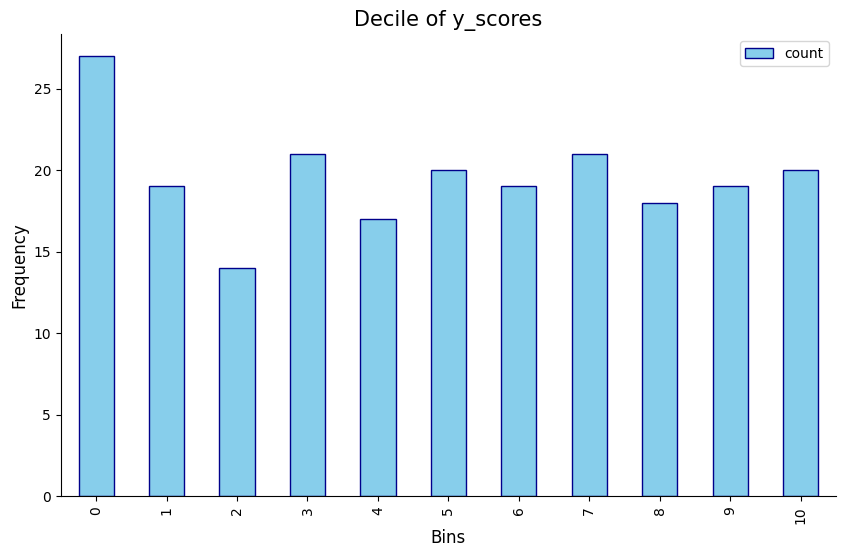

In [49]:
import matplotlib.pyplot as plt

scores = pd.Series(model.predict_proba(X_test[drivers])[:, 1])
print(f"True Distribution of target:\n{y_test.value_counts()}")
# Generate the data
max_q = 10
bin_scores = pd.DataFrame(
    pd.qcut(scores, max_q + 1, labels=False, duplicates="drop")
    .value_counts()
    .sort_index()
)

# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot
bin_scores.plot(kind="bar", ax=ax, color="skyblue", edgecolor="darkblue")

# Set the title and labels
ax.set_title("Decile of y_scores", fontsize=15)
ax.set_xlabel("Bins", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

# Remove the right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Display the plot
plt.show()

In [50]:
from src.model.evaluation import *

In [51]:
y_pred_test = model.predict_proba(X_test[drivers])
ModelEvaluationBinaryClassification(
    model=model, y_proba=y_pred_test, y=y_test, cutoff_score=optimal_threshold
).run()

Confusion Matrix:
 [[118  17]
 [ 22  58]]


,ROC AUC Score,Accuracy,Precision,Recall,F1 Score,F0.5 Score,F2 Score
Model,,,,,,,
0,0.799537,0.818605,0.773333,0.725,0.748387,0.763158,0.734177


In [52]:
drivers

['f_f_daily_amount_inflow__rolling_mean_10_days_max',
 'f_f_daily_amount_inflow__rolling_max_40_days_min',
 'f_f_daily_amount_inflow__rolling_percentile_40_50_days_size_ratio_f_f_daily_amount_inflow__rolling_percentile_90_30_days_max',
 'f_f_daily_amount_outflow__rolling_percentile_80_20_days_mean_ratio_f_f_daily_amount_inflow__rolling_max_20_days_std',
 'f_f_daily_amount_inflow__rolling_mean_70_days_size_ratio_f_f_daily_amount_inflow__rolling_percentile_90_50_days_skew']

In [53]:
drivers

['f_f_daily_amount_inflow__rolling_mean_10_days_max',
 'f_f_daily_amount_inflow__rolling_max_40_days_min',
 'f_f_daily_amount_inflow__rolling_percentile_40_50_days_size_ratio_f_f_daily_amount_inflow__rolling_percentile_90_30_days_max',
 'f_f_daily_amount_outflow__rolling_percentile_80_20_days_mean_ratio_f_f_daily_amount_inflow__rolling_max_20_days_std',
 'f_f_daily_amount_inflow__rolling_mean_70_days_size_ratio_f_f_daily_amount_inflow__rolling_percentile_90_50_days_skew']